In [2]:
import importlib
import prepare_vocab
import train
import eval
import config
from data.loader import DataLoader
from utils import constant
importlib.reload(config)

<module 'config' from 'C:\\prabhu\\edu\\code\\w266\\final_project\\config.py'>

In [3]:

vocab_params = config.VocabParameters()
training_params = config.TrainingParameters()
eval_params = config.EvalParameters()
opt = vars(vocab_params)
opt['num_class'] = len(constant.LABEL_TO_ID)
opt.update(vars(training_params))

In [4]:
vocab = prepare_vocab.prepare_voabulary (vocab_params)

loading files...
2525296 tokens from 68124 examples loaded from ./dataset/tacred/train.json.
802558 tokens from 22631 examples loaded from ./dataset/tacred/dev.json.
539009 tokens from 15509 examples loaded from ./dataset/tacred/test.json.
loading glove...
2195892 words loaded from glove.
building vocab...
vocab built with 55950/62152 words.
calculating oov...
train oov: 20546/2525296 (0.81%)
dev oov: 45801/802558 (5.71%)
test oov: 33634/539009 (6.24%)
building embeddings...
embedding size: 55950 x 300
dumping to files...
all done.


In [5]:
from utils.vocab import Vocab
vocab_file = vocab_params.vocab_dir + '/vocab.pkl'
vocab = Vocab(vocab_file, load=True)

Vocab size 55950 loaded from file


In [6]:
i = 0
for value in vocab.word2id:
    i +=1
    print(value)
    if i >20: 
        break

<PAD>
<UNK>
SUBJ-ORGANIZATION
SUBJ-PERSON
OBJ-PERSON
OBJ-ORGANIZATION
OBJ-DATE
OBJ-NUMBER
OBJ-TITLE
OBJ-COUNTRY
OBJ-LOCATION
OBJ-CITY
OBJ-MISC
OBJ-STATE_OR_PROVINCE
OBJ-DURATION
OBJ-NATIONALITY
OBJ-CAUSE_OF_DEATH
OBJ-CRIMINAL_CHARGE
OBJ-RELIGION
OBJ-URL
OBJ-IDEOLOGY


In [7]:
# load data
print("Loading data from {} with batch size {}...".format(vocab_params.data_dir, training_params.batch_size))
train_batch = DataLoader(vocab_params.data_dir+ '/train.json', training_params.batch_size, opt, vocab, evaluation=False)
dev_batch = DataLoader(vocab_params.data_dir + '/dev.json', training_params.batch_size, opt, vocab, evaluation=True)

Loading data from ./dataset/tacred with batch size 50...
1363 batches created for ./dataset/tacred/train.json
453 batches created for ./dataset/tacred/dev.json


In [8]:
import json
with open(vocab_params.data_dir+ '/train.json') as infile:
    json_data = json.load(infile)
len(json_data)


68124

In [9]:
import pandas as pd
train_df = pd.DataFrame(json_data )
train_df_sorted = train_df.sort_values(by=['docid','id'], ascending = True)
train_df_sorted.head(10)

,id,docid,relation,token,subj_start,subj_end,obj_start,obj_end,subj_type,obj_type,stanford_pos,stanford_ner,stanford_head,stanford_deprel
42795,61b3a65fb960f284ebac,03c67d9ee4bf4ed33cbeddaa3a7b82cc,no_relation,"[Red, Sox, 12, ,, Athletics, 2]",0,1,4,4,ORGANIZATION,ORGANIZATION,"[NNP, NNP, CD, ,, NNP, CD]","[ORGANIZATION, ORGANIZATION, NUMBER, O, ORGANI...","[2, 0, 2, 2, 2, 5]","[compound, ROOT, nummod, punct, appos, nummod]"
46757,61b3a65fb9080a05b4ee,15df2fc6a9a895432237cb2bdfcbd1b5,no_relation,"[Thomas, ', assertion, of, 85, %, reporters, v...",41,43,31,31,ORGANIZATION,DATE,"[NNP, POS, NN, IN, CD, NN, NNS, VBP, JJ, VBZ, ...","[PERSON, O, O, O, PERCENT, PERCENT, O, O, MISC...","[3, 1, 8, 7, 6, 7, 3, 0, 12, 12, 12, 8, 12, 18...","[nmod:poss, case, nsubj, case, compound, amod,..."
36591,61b3a65fb9883fc52f01,274e368f381c1476fe0da7f201bfc331,no_relation,"[Kerry, did, his, duty, and, did, it, well, .]",2,2,0,0,PERSON,PERSON,"[NNP, VBD, PRP$, NN, CC, VBD, PRP, RB, .]","[PERSON, O, O, O, O, O, O, O, O]","[2, 0, 4, 2, 2, 2, 6, 6, 2]","[nsubj, ROOT, nmod:poss, dobj, cc, conj, dobj,..."
22262,61b3a65fb937b50fc05a,409fa10efff702a41701bdddab89a2dd,no_relation,"[This, August, ,, Moschella, 's, name, came, u...",17,20,39,40,ORGANIZATION,STATE_OR_PROVINCE,"[DT, NNP, ,, NNP, POS, NN, VBD, RP, IN, DT, NN...","[DATE, DATE, O, PERSON, O, O, O, O, O, O, O, O...","[2, 0, 2, 6, 4, 7, 2, 7, 11, 11, 7, 15, 15, 15...","[det, ROOT, punct, nmod:poss, case, nsubj, acl..."
644,61b3a5f2e85a8088c7bb,78d7e406b6911492f6f7f122d1f112ad,org:top_members/employees,"[Sharpton, is, president, of, the, National, A...",5,7,0,0,ORGANIZATION,PERSON,"[NNP, VBZ, NN, IN, DT, NNP, NNP, NNP, .]","[PERSON, O, O, O, O, ORGANIZATION, ORGANIZATIO...","[3, 3, 0, 8, 8, 8, 8, 3, 3]","[nsubj, cop, ROOT, case, det, compound, compou..."
4138,61b3a37935aa6ae21928,84e924385dc7fb52b0417306a8500cb1,per:origin,"[She, is, an, American, actress, and, singer, .]",0,0,3,3,PERSON,NATIONALITY,"[PRP, VBZ, DT, JJ, NN, CC, NN, .]","[O, O, O, MISC, O, O, O, O]","[5, 5, 5, 5, 0, 5, 5, 5]","[nsubj, cop, det, amod, ROOT, cc, conj, punct]"
32520,61b3afb926759a7aef5a,84e924385dc7fb52b0417306a8500cb1,per:title,"[She, is, an, American, actress, and, singer, .]",0,0,6,6,PERSON,TITLE,"[PRP, VBZ, DT, JJ, NN, CC, NN, .]","[O, O, O, MISC, O, O, O, O]","[5, 5, 5, 5, 0, 5, 5, 5]","[nsubj, cop, det, amod, ROOT, cc, conj, punct]"
41668,61b3afb926aa0b82acad,84e924385dc7fb52b0417306a8500cb1,per:title,"[She, is, an, American, actress, and, singer, .]",0,0,4,4,PERSON,TITLE,"[PRP, VBZ, DT, JJ, NN, CC, NN, .]","[O, O, O, MISC, O, O, O, O]","[5, 5, 5, 5, 0, 5, 5, 5]","[nsubj, cop, det, amod, ROOT, cc, conj, punct]"
62446,61b3a65fb9b37d516ec9,85b9cca690e98657db2480fb91e05489,no_relation,"[Washington, ,, DC, :, American, Psychiatric, ...",4,6,7,7,ORGANIZATION,NUMBER,"[NNP, ,, NNP, :, NNP, NNP, NNP, CD, .]","[LOCATION, O, LOCATION, O, ORGANIZATION, ORGAN...","[0, 1, 1, 1, 7, 7, 1, 7, 1]","[ROOT, punct, appos, punct, compound, compound..."
66891,61b3a65fb9b8efc052b6,AFP_ENG_19941018.0328.LDC2007T07,no_relation,"[President, Bill, Clinton, 's, top, defense, a...",42,44,39,39,PERSON,PERSON,"[NNP, NNP, NNP, POS, JJ, NN, CC, JJ, NN, NNS, ...","[O, PERSON, PERSON, O, O, O, O, O, O, O, O, O,...","[3, 3, 6, 3, 6, 11, 6, 10, 10, 6, 0, 13, 46, 1...","[compound, compound, nmod:poss, case, amod, ns..."


In [10]:
len(train_df)

68124

In [11]:
import matplotlib.pyplot as plt
relation_df = train_df.groupby("relation")["id"].count().sort_values(ascending=False)
relation_df

relation
no_relation                            55112
per:title                               2443
org:top_members/employees               1890
per:employee_of                         1524
org:alternate_names                      808
org:country_of_headquarters              468
per:countries_of_residence               445
per:age                                  390
org:city_of_headquarters                 382
per:cities_of_residence                  374
per:stateorprovinces_of_residence        331
per:origin                               325
org:subsidiaries                         296
org:parents                              286
per:spouse                               258
org:stateorprovince_of_headquarters      229
per:children                             211
per:other_family                         179
org:members                              170
per:siblings                             165
per:parents                              152
per:schools_attended                     149
p

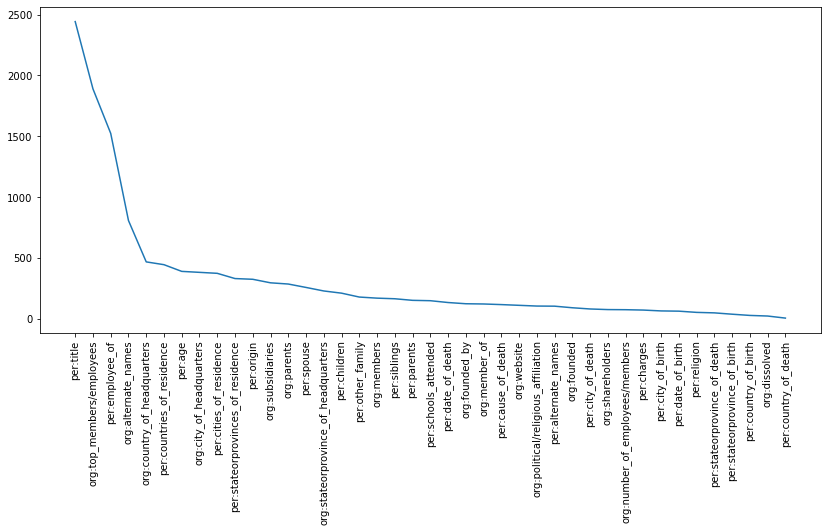

In [12]:
%matplotlib inline
relation1_df = train_df[train_df["relation"] != "no_relation"].groupby("relation")["id"].count().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.xticks( rotation=90)
plt.plot(relation1_df)


In [13]:
train_df.columns

Index(['id', 'docid', 'relation', 'token', 'subj_start', 'subj_end',
       'obj_start', 'obj_end', 'subj_type', 'obj_type', 'stanford_pos',
       'stanford_ner', 'stanford_head', 'stanford_deprel'],
      dtype='object')

## Expanding List columns to rows, so that we can analyze better

In [14]:
import numpy as np
def expand_list(df, list_columns, new_columns): 
    lens_of_lists = df[list_columns[0]].apply(len)
    origin_rows = range(df.shape[0])
    destination_rows = np.repeat(origin_rows, lens_of_lists)
    non_list_cols = (
      [idx for idx, col in enumerate(df.columns)
       if col not in list_columns]
    )
    expanded_df = df.iloc[destination_rows, non_list_cols].copy()
    for new_column, list_column in zip(new_columns,list_columns):
        expanded_df[new_column] = (
          [item for items in df[list_column] for item in items]
          )
    expanded_df.reset_index(inplace=True, drop=True)
    return expanded_df

#usage
train_tokens_df  = expand_list(train_df,['token','stanford_pos', 'stanford_ner', 'stanford_head', 'stanford_deprel'],  ['token_splitted', 'pos','ner', 'head', 'deprel'] )
train_tokens_df.groupby('pos')['pos'].count().sort_values(ascending=False)


pos
NNP      498547
NN       307679
IN       264369
DT       188275
,        154261
JJ       134922
NNS       98927
VBD       91132
CD        72827
CC        68148
.         64539
RB        51995
VB        47470
TO        46999
PRP       45974
VBN       45818
VBG       37914
VBZ       37466
PRP$      33458
:         29903
POS       26548
-RRB-     20930
-LRB-     20747
''        20103
``        19942
VBP       16631
MD        14386
NNPS      11180
WP        10200
WDT        9795
WRB        6509
RP         6209
JJR        4733
JJS        3952
$          3368
RBR        1957
FW         1716
SYM        1379
EX         1184
RBS         990
WP$         824
PDT         549
LS          484
UH          275
#            82
Name: pos, dtype: int64

In [15]:
train_tokens_df.groupby('ner')['ner'].count().sort_values(ascending=False)

ner
O               1907113
PERSON           192199
ORGANIZATION     169979
LOCATION          74310
DATE              67623
NUMBER            41292
MISC              29578
DURATION          14355
MONEY             12000
PERCENT            6189
ORDINAL            5360
TIME               4037
SET                1261
Name: ner, dtype: int64

In [16]:
train_tokens_df.groupby('token_splitted')['token_splitted'].count().sort_values(ascending=False)

token_splitted
,                   154260
the                 109116
.                    63711
of                   59872
and                  56473
                     ...  
Fern                     1
organización             1
Raoul                    1
Fernandez-Ansola         1
►                        1
Name: token_splitted, Length: 62152, dtype: int64

In [17]:
train_tokens_df.groupby('head')['head'].count().sort_values(ascending=False)

head
4     85613
3     81060
5     80995
6     80007
7     76451
      ...  
89      218
92      206
93      193
94        3
95        1
Name: head, Length: 96, dtype: int64

In [18]:
train_tokens_df.groupby('deprel')['deprel'].count().sort_values(ascending=False)

deprel
punct           329463
compound        320847
case            273899
nmod            238648
det             181625
nsubj           137815
amod            130419
conj             94306
dobj             92220
ROOT             68124
cc               67973
mark             59303
nmod:poss        58633
advmod           55685
appos            49362
nummod           47278
dep              44400
aux              37868
ccomp            36372
advcl            27490
acl:relcl        25892
xcomp            25732
cop              21879
acl              20627
auxpass          16862
nsubjpass        14651
nmod:tmod        11587
neg               8700
compound:prt      6577
mwe               5499
parataxis         4399
root              3772
nmod:npmod        2774
expl              1105
csubj              974
iobj               876
cc:preconj         800
det:predet         609
csubjpass          135
discourse          116
Name: deprel, dtype: int64

In [19]:
train_df[train_df["docid"]== "AFP_ENG_19960428.0415.LDC2007T07"]

,id,docid,relation,token,subj_start,subj_end,obj_start,obj_end,subj_type,obj_type,stanford_pos,stanford_ner,stanford_head,stanford_deprel
8114,61b3a65fb91dc38315f0,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",22,25,27,27,ORGANIZATION,ORGANIZATION,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
22042,61b3a65fb955534324a9,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",27,27,19,19,ORGANIZATION,MISC,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
23254,61b3a65fb9d54b6726bd,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",22,25,33,35,ORGANIZATION,ORGANIZATION,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
26561,61b3a65fb9899926c766,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",22,25,18,18,ORGANIZATION,NUMBER,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
45348,61b3a65fb976b7c07853,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",22,25,9,9,ORGANIZATION,MISC,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
50702,61b3a65fb9dd93965ad1,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",22,25,19,19,ORGANIZATION,MISC,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
54072,61b3a65fb98c2d5bc85b,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",27,27,33,35,ORGANIZATION,ORGANIZATION,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."
62809,61b3a65fb962a5bcb0e5,AFP_ENG_19960428.0415.LDC2007T07,no_relation,"[Besides, Swires, ,, one, of, Hong, Kong, 's, ...",22,25,1,1,ORGANIZATION,PERSON,"[IN, NNS, ,, CD, IN, NNP, NNP, POS, JJS, JJ, N...","[O, PERSON, O, NUMBER, O, LOCATION, LOCATION, ...","[2, 18, 18, 18, 11, 7, 11, 7, 11, 11, 4, 4, 14...","[case, nmod, punct, dep, case, compound, nmod:..."


## Creating a  simple text document of all the sentences

In [20]:
def generate_docs(df, token_list_field, doc_id_field, file_path):
    df_sorted = df.sort_values(by=[doc_id_field, "id"], inplace=False)
    doc_id = df[doc_id_field][0]
    doc_string = ""
    f = open(file_path, "w")
    for ind in df_sorted.index: 
#       still in the same document
        if doc_id == df_sorted[doc_id_field][ind]:
            doc_string += " ".join(df_sorted[token_list_field][ind])
        else:
#             print(doc_id, ": ", doc_string, "\n")
            try:
                f.write(doc_id + ": " + doc_string + "\n")
            except Exception as inst:
                print(doc_id, ind, ":", inst)
                
            doc_string = ""
            doc_id = df_sorted[doc_id_field][ind]
            doc_string += " ".join(df_sorted[token_list_field][ind])
    
    f.close()

In [21]:
file_path = vocab_params.data_dir + "/raw.txt"
generate_docs(train_df, "token", "docid", file_path)
# train_df["docid"][0]
# train_df.sort_values(by=["docid"], inplace=True)
# train_df

eng-NG-31-100504-10870400 3218 : 'charmap' codec can't encode characters in position 152-162: character maps to <undefined>
eng-NG-31-142144-8684517 63360 : 'charmap' codec can't encode character '\u25aa' in position 26: character maps to <undefined>
eng-NG-31-149627-10595924 33227 : 'charmap' codec can't encode character '\u06cc' in position 127: character maps to <undefined>
eng-NG-31-149836-10610656 25890 : 'charmap' codec can't encode character '\u011e' in position 32: character maps to <undefined>
eng-NG-31-149836-10610671 4692 : 'charmap' codec can't encode character '\u0131' in position 50: character maps to <undefined>
eng-NG-31-149836-10611058 4375 : 'charmap' codec can't encode character '\u0131' in position 80: character maps to <undefined>
eng-WL-11-174572-12948689 20279 : 'charmap' codec can't encode character '\u25ba' in position 27: character maps to <undefined>
eng-WL-11-174611-12970821 31130 : 'charmap' codec can't encode character '\u2033' in position 205: character m

## Looking at the relationships that didn't work well in the baseline


In [34]:
i = 0
for token in train_df[train_df["relation"] == "per:employee_of"]["token"]:
    print (" ".join(token), "\n \n")
    i+=1
    if i > 20:
        break

Olivia Palermo was looking very Blair Waldorfish at last week 's You Know You Want It : Style-Inspiration-Confidence book launch , so it 's only fitting she ran into real-life Gossip Girl s Leighton Meester and Nicole Fiscella on her way there ! 
 

Donald Wildmon , the founder and head of the American Family Association , is asking its members to petition Congress to end all funding for PBS . 
 

California Sen Boxer seeks support for Senate climate bill `` There are some in the Senate who insist that global warming is nothing more than science fiction , '' Sen Barbara Boxer said in the Democrats ' weekly radio address . 
 

While Juventus still holds the record with 27 Serie A titles , it has not officially won the `` scudetto '' since 2002-03 , when Ferrara was winding down an 11-year stint as a defender for the Bianconeri . 
 

The Rev. George Young , pastor of Holy Temple Baptist Church in Oklahoma City , has taught dozens of secular marriage skills courses to low-income men and w

In [35]:
i = 0
for token in train_df[train_df["relation"] == "org:alternate_names"]["token"]:
    print (" ".join(token), "\n \n")
    i+=1
    if i > 20:
        break

But US and Indian experts say it has hesitated to take action against Lashkar-e-Taiba , which means `` The Army of the Pure , '' believing that the Islamic militants could prove useful in pressuring its historic rival India . 
 

Abu Mujahid , spokesman of the Popular Resistance Committee -LRB- PRC -RRB- said in a statement sent to reporters that the contradicted statements of the Israeli officials `` show that Israel is the one which delays and blocks the swap . '' 
 

Football : Allardyce becomes new Blackburn manager `` Blackburn Rovers are delighted to announce the appointment of Sam Allardyce as manager with immediate effect , '' a statement on the club 's official website said . 
 

Amadeo Perez Jr. , chairman of the Manila Economic and Cultural Office -LRB- MECO -RRB- , extended a welcome to the mission at the party . 
 

With Hawkins ' help , Kinmen Kaoliang Liquor -LRB- KKL -RRB- has opened the season with a 4-2 record and is the league 's most improved team . 
 

The Asian De

## Exploring with Spacy

In [23]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [24]:
def generate_spacy_tokens(df, token_list_field, doc_id_field):
    df_sorted = df.sort_values(by=[doc_id_field, "id"], inplace=False)
    doc_id = df[doc_id_field][0]
    doc_string = ""
    spacy_tokens = []
    for ind in df_sorted.index: 
#       still in the same document
        if doc_id == df_sorted[doc_id_field][ind]:
            doc_string += " ".join(df_sorted[token_list_field][ind])
        else:
            spacy_tokens.append(nlp(doc_string))   
            doc_string = ""
            doc_id = df_sorted[doc_id_field][ind]
            doc_string += " ".join(df_sorted[token_list_field][ind])
    
    return(spacy_tokens)

In [25]:
len(train_df['docid'].unique())

26369

In [26]:
spacy_tokens = generate_spacy_tokens(train_df, "token", "docid")
len(spacy_tokens)

26369

In [27]:
spacy_tokens[0]